In [15]:
# !pip install snap-stanford

In [16]:
# import torch torch_geometric datasets
from torch_geometric.datasets import KarateClub
import networkx as nx
from typing import List, Tuple,Literal
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.cluster import SpectralClustering
import numpy as np
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

In [17]:
def get_graph(data):
    G=nx.Graph()
    G.add_nodes_from(range(data.num_nodes))
    G.add_edges_from(data.edge_index.t().tolist())
    return G

In [18]:
def get_nmi(data,state:List[int]):
    y=list(data.y)
    return normalized_mutual_info_score(y,state)

In [19]:
dataset=KarateClub()
data=dataset[0]

In [20]:
data.y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

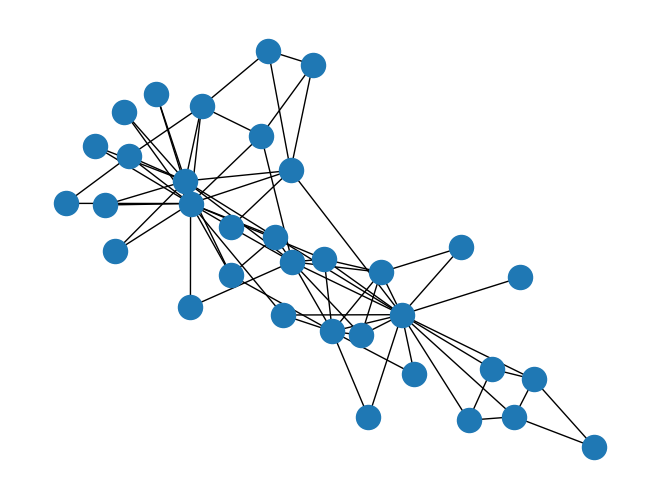

In [21]:
G=get_graph(data)
nx.draw(G)

In [22]:
state=[i for i in G.nodes()]

In [23]:
get_nmi(data,state)

0.5292134747717729

In [24]:
def clustering(A,n_clusters = 2,assign_labels:Literal['kmeans', 'discretize', 'cluster_qr']='kmeans'):
    D = np.diag(np.sum(A, axis=1))
    L = D - A
    eigenvalues, eigenvectors = np.linalg.eigh(L)
    idx = eigenvalues.argsort()[:n_clusters]
    U = eigenvectors[:,idx]
    sc = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels=assign_labels)
    return sc.fit_predict(U)

In [27]:
A = nx.adjacency_matrix(G).todense()
k_state=clustering(A,4)
get_nmi(data,k_state)

0.6545629343784564

In [28]:
from torch_geometric import datasets

In [29]:
datasets_names=datasets.__all__

In [30]:
from torch_geometric.datasets import BA2MotifDataset
dataset=BA2MotifDataset(root='data/BA2Motif')
dataset[0]

Data(x=[25, 10], edge_index=[2, 50], y=[1])

In [31]:
from torch_geometric.datasets import BA2MotifDataset
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data
from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid


In [32]:
from torch_geometric.datasets import GNNBenchmarkDataset
# import all data from from torch_geometric.datasets
datasets=[]
datasets.append(GNNBenchmarkDataset(root='data/GNNBenchmarkDataset', name='MNIST')[0])
datasets.append(GNNBenchmarkDataset(root='data/GNNBenchmarkDataset', name='CIFAR10')[0])
datasets.append(GNNBenchmarkDataset(root='data/GNNBenchmarkDataset', name='PATTERN')[0])
datasets.append(GNNBenchmarkDataset(root='data/GNNBenchmarkDataset', name='CLUSTER')[0])
datasets.append(GNNBenchmarkDataset(root='data/GNNBenchmarkDataset', name='TSP')[0])
datasets.append(GNNBenchmarkDataset(root='data/GNNBenchmarkDataset', name='CSL')[0])

In [33]:
from torch_geometric.datasets import TUDataset
datasets.append(TUDataset(root='data/TUDataset', name='MUTAG')[0])
datasets.append(TUDataset(root='data/TUDataset', name='IMDB-BINARY')[0])
datasets.append(TUDataset(root='data/TUDataset', name='IMDB-MULTI')[0])
datasets.append(TUDataset(root='data/TUDataset', name='REDDIT-BINARY')[0])
datasets.append(TUDataset(root='data/TUDataset', name='REDDIT-MULTI-5K')[0])
datasets.append(TUDataset(root='data/TUDataset', name='COLLAB')[0])
datasets.append(TUDataset(root='data/TUDataset', name='PROTEINS')[0])
datasets.append(TUDataset(root='data/TUDataset', name='DD')[0])
datasets.append(TUDataset(root='data/TUDataset', name='NCI1')[0])
datasets.append(TUDataset(root='data/TUDataset', name='NCI109')[0])
datasets.append(TUDataset(root='data/TUDataset', name='ENZYMES')[0])
datasets.append(TUDataset(root='data/TUDataset', name='PTC_MR')[0])
datasets.append(TUDataset(root='data/TUDataset', name='NCI1')[0])
datasets.append(TUDataset(root='data/TUDataset', name='NCI109')[0])


In [34]:
from torch_geometric.datasets import Planetoid
datasets.append(Planetoid(root='data/Planetoid', name='Cora')[0])
datasets.append(Planetoid(root='data/Planetoid', name='CiteSeer')[0])
datasets.append(Planetoid(root='data/Planetoid', name='PubMed')[0])
from torch_geometric.datasets import Amazon
datasets.append(Amazon(root='data/Amazon', name='Computers')[0])
datasets.append(Amazon(root='data/Amazon', name='Photo')[0])
from torch_geometric.datasets import QM9
datasets.append(QM9(root='data/QM9')[0])
from torch_geometric.datasets import QM7b
datasets.append(QM7b(root='data/QM7b')[0])
from torch_geometric.datasets import MNISTSuperpixels
datasets.append(MNISTSuperpixels(root='data/MNISTSuperpixels')[0])
from torch_geometric.datasets import FakeDataset
datasets.append(FakeDataset()[0])
from torch_geometric.datasets import FakeHeteroDataset
datasets.append(FakeHeteroDataset()[0])
from torch_geometric.datasets import NELL
datasets.append(NELL(root='data/NELL')[0])
from torch_geometric.datasets import CitationFull
datasets.append(CitationFull(root='data/CitationFull', name='cora')[0])
datasets.append(CitationFull(root='data/CitationFull', name='citeseer')[0])
datasets.append(CitationFull(root='data/CitationFull', name='pubmed')[0])
from torch_geometric.datasets import CoraFull
datasets.append(CoraFull(root='data/CoraFull')[0])
from torch_geometric.datasets import Coauthor
datasets.append(Coauthor(root='data/Coauthor', name='CS')[0])
datasets.append(Coauthor(root='data/Coauthor', name='Physics')[0])
from torch_geometric.datasets import WikiCS
datasets.append(WikiCS(root='data/WikiCS')[0])


c:\Users\jw_be\anaconda3\lib\site-packages\torch_geometric\datasets\wikics.py:38: UserWarning: The WikiCS dataset now returns an undirected graph by default. Please explicitly specify 'is_undirected=False' to restore the old behavior.
  warnings.warn(


In [44]:
datasets[0].y

tensor([1])

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels=3, num_classes=1, num_layers=3):
        super(GCN, self).__init__()
        self.convs = torch.nn.ModuleList()
        self.convs.append(GCNConv(num_node_features, hidden_channels))
        for _ in range(num_layers-2):
            self.convs.append(GCNConv(hidden_channels, hidden_channels))
        self.convs.append(GCNConv(hidden_channels, num_classes))

    def forward(self, x, edge_index):
        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index)
            if i != len(self.convs)-1:
                x = F.relu(x)
                x = F.dropout(x, p=0.5, training=self.training)
        return F.log_softmax(x, dim=1)


True

In [126]:
data.edge_index.t().tolist()
# to adjacency matrix using only np
adj=np.array([0]*data.num_nodes**2)
adj=adj.reshape(data.num_nodes,data.num_nodes)
for i in data.edge_index.t().tolist():
    adj[i[0]][i[1]]=1
    adj[i[1]][i[0]]=1
adj

array([[0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      

In [183]:
class GraphDataset(Dataset):
    adjs=[]
    states=[]
    nmi=[]
    def __init__(self,datasets,nb_states=6):
        self.nb_states=nb_states
        for data in tqdm(datasets,desc="Loading datasets"):
            if (data.y.shape[0]==1):
                continue
            adj=np.array([0]*data.num_nodes**2)
            adj=adj.reshape(data.num_nodes,data.num_nodes)
            for i in data.edge_index.t().tolist():
                adj[i[0]][i[1]]=1
                adj[i[1]][i[0]]=1
            self.adjs.append(adj)
            self.states.append(data.y)
            self.nmi.append(1)
            for i in range(nb_states):
                state=clustering(adj,i+2)
                self.states.append(state)
                self.nmi.append(normalized_mutual_info_score(data.y,state))

    def __len__(self):
        return len(self.states)
    
    def __getitem__(self, idx):
        state=self.states[idx]
        adj=self.adjs[idx//(self.nb_states+1)]
        nmi=self.nmi[idx]
        
        sample = {'state': state, 'adj': adj,'nmi':nmi}     

        return sample

In [184]:
dataset=GraphDataset(datasets,1)

  0%|          | 0/32 [00:00<?, ?it/s]c:\Users\jw_be\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
 47%|████▋     | 15/32 [00:09<00:10,  1.66it/s]c:\Users\jw_be\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
 50%|█████     | 16/32 [00:23<00:29,  1.83s/it]

In [99]:
dataloader = DataLoader(
    dataset=dataset,
    batch_size=1,
    shuffle=True)

In [106]:
for sample in dataloader:
    print(sample['nmi'])
    

tensor([0.7748], dtype=torch.float64)
tensor([1])
tensor([0.6021], dtype=torch.float64)
tensor([0.6021], dtype=torch.float64)
tensor([0.6988], dtype=torch.float64)
tensor([0.6332], dtype=torch.float64)
tensor([1])
tensor([0.6904], dtype=torch.float64)
tensor([0.7748], dtype=torch.float64)
tensor([0.6021], dtype=torch.float64)
tensor([0.7748], dtype=torch.float64)
tensor([1])
tensor([0.7042], dtype=torch.float64)
tensor([0.6332], dtype=torch.float64)
tensor([0.6332], dtype=torch.float64)


In [ ]:
# create dataloader for all datasets
# for name in datasets_names:
#     dataset=eval('datasets.{}()'.format(name))
#     data=dataset[0]

In [ ]:
def train(dataset):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = GCN(dataset.num_features).to(device)
    data = dataset[0].to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

    model.train()
    for epoch in range(200):
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = F.nll_loss(out, get_nmi(data,k_state))
        loss.backward()
        optimizer.step()

    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    test_correct = pred[data.test_mask] == data.y[data.test_mask]
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
    return test_acc 